In [3]:
ratings = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\ratings.dat')
rating_distribution = dict()
movieId_count = dict()

for line in ratings:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    if columns[2] == 5:
        columns.append('High')
    elif columns[2] == 4 or columns[2] == 3:
        columns.append('Medium')
    else:
        columns.append('Low')

    if columns[1] in movieId_count:
        movieId_count[columns[1]] += 1
    else: 
        movieId_count[columns[1]] = 1

    if columns[4] in rating_distribution:
        rating_distribution[columns[4]] += 1
    else:
        rating_distribution[columns[4]] = 1

for rating_range in rating_distribution:
    print('{0} {1}'.format(rating_range, int(rating_distribution[rating_range] / sum(rating_distribution.values()) * 100)))

movies = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\movies.dat')
movieId_name = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    movieId_name[int(columns[0])] = columns[1]
    
sorted_counted_data = sorted(movieId_count.items(), key = lambda x:x[1], reverse=True)[:10]
for movieId, count in sorted_counted_data:
    print(movieId_name[movieId], count)

High 22
Medium 61
Low 16
American Beauty (1999) 3428
Star Wars: Episode IV - A New Hope (1977) 2991
Star Wars: Episode V - The Empire Strikes Back (1980) 2990
Star Wars: Episode VI - Return of the Jedi (1983) 2883
Jurassic Park (1993) 2672
Saving Private Ryan (1998) 2653
Terminator 2: Judgment Day (1991) 2649
Matrix, The (1999) 2590
Back to the Future (1985) 2583
Silence of the Lambs, The (1991) 2578


In [89]:
# 2. **Genre Insights**
# `Which movie genres are the most frequently rated?`

movies = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\movies.dat')
rating = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\ratings.dat')

movie_genre = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    genre_list = columns[2].split('|')
    movie_genre[int(columns[0])] = genre_list

movie_rating_count = dict()
for line in rating:
    line = line.strip()
    columns = line.split('::')
    movie_id = int(columns[1])
    if movie_id in movie_rating_count:
        movie_rating_count[movie_id] += 1
    else:
        movie_rating_count[movie_id] = 1
        
genre_count = dict()
for movie_id, count in movie_rating_count.items():
    genres = movie_genre.get(movie_id, [])
    for genre in genres:
        if genre in genre_count:
            genre_count[genre] += count
        else:
            genre_count[genre] = count

sorted_genre = sorted(genre_count.items(), key = lambda x: x[1], reverse = True)

print("Most frequently rated genre are")
for genre in sorted_genre:
    print(genre[0], ":",genre[1])

movies.close()
rating.close()

Most frequently rated genre are
Comedy : 356580
Drama : 354529
Action : 257457
Thriller : 189680
Sci-Fi : 157294
Romance : 147523
Adventure : 133953
Crime : 79541
Horror : 76386
Children's : 72186
War : 68527
Animation : 43293
Musical : 41533
Mystery : 40178
Fantasy : 36301
Western : 20683
Film-Noir : 18261
Documentary : 7910


In [109]:
# 2. **Genre Insights**

# `Compare the average ratings across different genres. Are certain genres consistently rated higher or lower?`
movies = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\movies.dat')
rating = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\ratings.dat')

movie_genre = dict()
for line in movies:
    line = line.strip()
    columns = line.split('::')
    genre_list = columns[2].split('|')
    movie_genre[int(columns[0])] = genre_list

genre_ratings = dict()
for line in rating:
    line = line.strip()
    columns = line.split('::')
    movie_id = int(columns[1])
    rate = int(columns[2])
    genres = movie_genre.get(movie_id, [])
    
    for genre in genres:
        if genre not in genre_ratings:
            genre_ratings[genre] = []  
        genre_ratings[genre].append(rate)

genre_avg_ratings = {}
for genre, ratings_list in genre_ratings.items():
    total_ratings = sum(ratings_list)
    count_ratings = len(ratings_list)
    avg_rating = total_ratings / count_ratings
    genre_avg_ratings[genre] = avg_rating

sorted_average = sorted(genre_avg_ratings.items(), key = lambda x : x[1])
print("Average rating")
for genre, avg in sorted_avgerage:
    print(f"{genre}: {avg:.2f}")

print(f"Maximum rating: {sorted_avgerage[-1][0]} with {sorted_avgerage[-1][1]:.2f}")
print(f"Minimum rating: {sorted_avgerage[0][0]} with {sorted_avgerage[0][1]:.2f}")

Average rating
Horror: 3.22
Children's: 3.42
Fantasy: 3.45
Sci-Fi: 3.47
Adventure: 3.48
Action: 3.49
Comedy: 3.52
Thriller: 3.57
Romance: 3.61
Western: 3.64
Musical: 3.67
Mystery: 3.67
Animation: 3.68
Crime: 3.71
Drama: 3.77
War: 3.89
Documentary: 3.93
Film-Noir: 4.08
Maximum rating: Film-Noir with 4.08
Minimum rating: Horror with 3.22


In [3]:
# 3. **User Engagement Analysis**

# `Identify the most active users (profession) based on the number of ratings they’ve given.`

rating = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\ratings.dat')
user = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\users.dat')

user_ocupation = dict()
user_rating = dict()

for line in rating:
    line = line.strip()
    columns = line.split('::')
    if user in user_rating :
        user_rating[int(columns[0])] += 1
    else:
        user_rating[int(columns[0])] = 1



for line in user:
    line = line.strip()
    columns = line.split('::')
    user_ocupation[int(columns[0])] = int(columns[3])



active_user_occupation = dict()
for user_id, rating_count in user_rating.items():
    occupation = user_ocupation.get(user_id)
    if occupation in active_user_occupation :
        active_user_occupation[occupation] += 1
    else:
        active_user_occupation[occupation] = 1


occupations_name = {0: "other or not specified",
               1: "academic/educator",
               2: "artist",
               3: "clerical/admin",
               4: "college/grad student",
               5: "customer service",
               6: "doctor/health care",
               7: "executive/managerial",
               8: "farmer",
               9: "homemaker",
               10: "K-12 student",
               11: "lawyer",
               12: "programmer",
               13: "retired",
               14: "sales/marketing",
               15: "scientist",
               16: "self-employed",
               17: "technician/engineer",
               18: "tradesman/craftsman",
               19: "unemployed",
               20: "writer"
              }
most_active = max(active_user_occupation.items(), key = lambda x :x[1])

active_occupation = occupations_name.get(most_active[0])
print("Most active users are from occupation", active_occupation, "with total rating", most_active[1])

Most active users are from occupation college/grad student with total rating 759


In [111]:
# 3. **User Engagement Analysis*
# `Analyze the relationship between user demographic attributes (age, gender, occupation) and their movie preferences or rating patterns.`

user_file = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\users.dat')
movies_file = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\movies.dat')
rating_file = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\ratings.dat')

user = dict()
for line in user_file:
    line = line.strip()
    columns = line.split('::')
    user[int(columns[0])] = {'gender' : columns[1] , 'age' : int(columns[2]), 'occupation' : int(columns[3])}

# print(user)

movie = dict()
for line in movies_file:
    line = line.strip()
    columns = line.split('::')
    movie[int(columns[0])] = {'title' : columns[1], 'genre' : columns[2]}

# print(movie)

rating = []
for line in rating_file:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    rating.append({'user_id' : columns[0], 'movie_id' : columns[1], 'rating' : columns[2]})

# print(rating)

agegroup = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}
age_group_ratings = {}
gender_ratings = {'M': [], 'F': []}
occupation_ratings = {}

for value in rating:
    user_id = value['user_id']
    movie_id = value['movie_id']
    rating = value['rating']

    userid = user[user_id]
    gender = user[user_id].get('gender')
    age_group = agegroup.get(user[user_id].get('age'))
    occupation = user[user_id].get('occupation')
    
    if age_group not in age_group_ratings:
        age_group_ratings[age_group] = []
    age_group_ratings[age_group].append(rating)

    gender_ratings[gender].append(rating)

    if occupation not in occupation_ratings:
        occupation_ratings[occupation] = []
    occupation_ratings[occupation].append(rating)


age_group_avg = {group: (sum(ratings) / len(ratings)) for group, ratings in age_group_ratings.items()}
print("Average rating by Age group :\n")
for group, avg in age_group_avg.items():
    print(f"{group}: {avg:.2f}")

gender_avg = {group: (sum(ratings) / len(ratings)) for group, ratings in gender_ratings.items()}
print("\nAverage rating by Gender:\n")
for group, avg in gender_avg.items():
    print(f"{group}: {avg:.2f}")


occupation_avg = {group: (sum(ratings) / len(ratings)) for group, ratings in occupation_ratings.items()}
print("\nAverage rating by occupation:\n")
for group, avg in occupation_avg.items():
    print(f"{occupations_name.get(group)}: {avg:.2f}")


Average rating by Age group :

Under 18: 3.55
56+: 3.77
25-34: 3.55
45-49: 3.64
50-55: 3.71
35-44: 3.62
18-24: 3.51

Average rating by Gender:

M: 3.57
F: 3.62

Average rating by occupation:

K-12 student: 3.53
self-employed: 3.60
scientist: 3.69
executive/managerial: 3.60
writer: 3.50
homemaker: 3.66
academic/educator: 3.58
programmer: 3.65
technician/engineer: 3.61
other or not specified: 3.54
clerical/admin: 3.66
sales/marketing: 3.62
college/grad student: 3.54
lawyer: 3.62
farmer: 3.47
unemployed: 3.41
artist: 3.57
tradesman/craftsman: 3.53
customer service: 3.54
retired: 3.78
doctor/health care: 3.66


In [43]:
# 4. **Rating Distribution by Demographics**

# `Are there specific genres preferred by certain age groups or occupations?`

user_file = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\users.dat')
movies_file = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\movies.dat')
rating_file = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\ratings.dat')

user = dict()
for line in user_file:
    line = line.strip()
    columns = line.split('::')
    user[int(columns[0])] = {'age' : int(columns[2]), 'occupation' : int(columns[3])}

movie_genre = dict()
for line in movies_file:
    line = line.strip()
    columns = line.split('::')
    genre_list = columns[2].split('|')
    movie_genre[int(columns[0])] = genre_list

agegroup = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
}

occupations_name = {0: "other or not specified",
               1: "academic/educator",
               2: "artist",
               3: "clerical/admin",
               4: "college/grad student",
               5: "customer service",
               6: "doctor/health care",
               7: "executive/managerial",
               8: "farmer",
               9: "homemaker",
               10: "K-12 student",
               11: "lawyer",
               12: "programmer",
               13: "retired",
               14: "sales/marketing",
               15: "scientist",
               16: "self-employed",
               17: "technician/engineer",
               18: "tradesman/craftsman",
               19: "unemployed",
               20: "writer"
              }
age_group_preferences = {}
occupation_preferences = {}

for line in rating_file:
    line = line.strip()
    columns = list(map(int, line.split("::")))
    user_id = columns[0]
    movie_id = columns[1]
    rating = columns[2]

    if (user_id in user) and (movie_id in movie_genre):
        user_data = user[user_id]
        genres = movie_genre[movie_id]

        age = user_data['age']
        if age not in age_group_preferences:
            age_group_preferences[age] = {}

        for genre in genres:
            if genre in age_group_preferences[age]:
                age_group_preferences[age][genre] +=1
            else:
                age_group_preferences[age][genre] =1

        occupation = user_data['occupation']
        if occupation not in occupation_preferences:
            occupation_preferences[occupation] = {}

        for genre in genres:
            if genre in occupation_preferences[occupation]:
                occupation_preferences[occupation][genre] +=1
            else:
                occupation_preferences[occupation][genre] =1


preference_by_age = sorted(age_group_preferences.items(), key = lambda x : x[0])
print("According to age preferences of genre")
for age in preference_by_age:
    print(agegroup.get(age[0]),":",end =' ')
    genre = max(age[1].items(), key = lambda x : x[1])
    print(genre[0])

preference_by_occupation = sorted(occupation_preferences.items(), key = lambda x : x[0])
print("\nAccording to occupation preferences of genre")
for occupation in preference_by_occupation:
    print(occupations_name.get(occupation[0]),":",end =' ')
    genre = max(occupation[1].items(), key = lambda x : x[1])
    print(genre[0])



According to age preferences of genre
Under 18 : Comedy
18-24 : Comedy
25-34 : Comedy
35-44 : Drama
45-49 : Drama
50-55 : Drama
56+ : Drama

According to occupation preferences of genre
other or not specified : Comedy
academic/educator : Drama
artist : Drama
clerical/admin : Comedy
college/grad student : Comedy
customer service : Comedy
doctor/health care : Drama
executive/managerial : Drama
farmer : Comedy
homemaker : Comedy
K-12 student : Comedy
lawyer : Drama
programmer : Comedy
retired : Drama
sales/marketing : Comedy
scientist : Drama
self-employed : Drama
technician/engineer : Comedy
tradesman/craftsman : Comedy
unemployed : Comedy
writer : Drama


In [89]:
# 5. **Top Performers**

# `Identify the movies with the highest average ratings (considering a minimum number of ratings for fairness).`

movies_file = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\movies.dat')
rating_file = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\ratings.dat')

movie = dict()
for line in movies_file:
    line = line.strip()
    columns = line.split('::')
    title = columns[1]
    movie[int(columns[0])] = {'title': title, 'genres': columns[2].split('|')}
movie_rating = {}

for line in rating_file:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    movie_id = columns[1]
    rating = columns[2]
    if movie_id not in movie_rating:
        movie_rating[movie_id] = []
    movie_rating[movie_id].append(rating)

avg_movie_rating = {}
minimum_rating = 50
for movie_id, rating_list in movie_rating.items():
    if(len(rating_list) >= minimum_rating):
        avg = sum(rating_list) / len(rating_list)
        avg_movie_rating[movie_id] = avg

hightest_avg_rating = sorted(avg_movie_rating.items(), key = lambda x : x[1], reverse = True)[:10]

# `Analyze the characteristics of top-rated movies (e.g., release year, genres).`

for avg_rating in hightest_avg_rating:
    title = movie[avg_rating[0]]['title']
    genres = movie[avg_rating[0]]['genres']
    avg = avg_rating[1]
    print(f"{title:<30} {avg:<15.2f} {genres}")

Sanjuro (1962)                 4.61            ['Action', 'Adventure']
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954) 4.56            ['Action', 'Drama']
Shawshank Redemption, The (1994) 4.55            ['Drama']
Godfather, The (1972)          4.52            ['Action', 'Crime', 'Drama']
Close Shave, A (1995)          4.52            ['Animation', 'Comedy', 'Thriller']
Usual Suspects, The (1995)     4.52            ['Crime', 'Thriller']
Schindler's List (1993)        4.51            ['Drama', 'War']
Wrong Trousers, The (1993)     4.51            ['Animation', 'Comedy']
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950) 4.49            ['Film-Noir']
Raiders of the Lost Ark (1981) 4.48            ['Action', 'Adventure']


In [5]:
# 6. **Exploring Long Tail**

# `Investigate the "long tail" of the dataset: How many movies receive very few ratings?`

movies_file = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\movies.dat')
rating_file = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\ratings.dat')
min_rating = 5

less_rated_movies = {}
popular_movies = {}

movie = dict()
for line in movies_file:
    line = line.strip()
    columns = line.split('::')
    title = columns[1]
    movie[int(columns[0])] = {'title': title, 'genres': columns[2].split('|')}
    
movie_rating = {}

for line in rating_file:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    movie_id = columns[1]
    rating = columns[2]
    if movie_id not in movie_rating:
        movie_rating[movie_id] = []
    movie_rating[movie_id].append(rating)

for movie_id, ratings in movie_rating.items():
    num_ratings = len(ratings)
    avg_rating = sum(ratings) / num_ratings

    if num_ratings <= min_rating:
        less_rated_movies[movie_id] = {
            'num_ratings': num_ratings,
            'avg_rating': avg_rating,
            'title': movie[movie_id]['title'],
            'genres': movie[movie_id]['genres']
        }
    else:
        popular_movies[movie_id] = {
            'num_ratings': num_ratings,
            'avg_rating': avg_rating,
            'title': movie[movie_id]['title'],
            'genres': movie[movie_id]['genres']
        }

print(f"\nTotal less-rated movies <= {min_rating} ratings : {len(less_rated_movies)}")
print(f"Total popular movies > {min_rating} rating : {len(popular_movies)}")


# `What are the characteristics of these less-rated movies compared to popular ones?`

def analyze_characteristics(movies):
    release_years_count = {}
    genres_count = {}

    for movie_id, info in movies.items():
        title = info['title']
        release_year = int(title[-5:-1])
        if release_year in release_years_count:
            release_years_count[release_year] +=1
        else:
            release_years_count[release_year] =1
            
                
        genres = info['genres']
        for genre in genres:
            if genre in genres_count:
                genres_count[genre] += 1
            else:
                genres_count[genre] = 1


    return release_years_count, genres_count

less_rated_years, less_rated_genres = analyze_characteristics(less_rated_movies)

popular_years, popular_genres = analyze_characteristics(popular_movies)

print("\nRelease year of less-rated movies:",dict(sorted(less_rated_years.items(), key=lambda x: x[1], reverse=True)[:5]))
print("Release year of popular movies:", dict(sorted(popular_years.items(), key=lambda x: x[1], reverse=True)[:5]))

print("\nGenres of less-rated movies:", dict(sorted(less_rated_genres.items(), key=lambda x: x[1], reverse=True)[:5]))
print("Genres of popular movies:", dict(sorted(popular_genres.items(), key=lambda x: x[1], reverse=True)[:5]))


Total less-rated movies <= 5 ratings : 329
Total popular movies > 5 rating : 3377

Release year of less-rated movies: {1995: 47, 1998: 41, 1996: 35, 1997: 30, 1994: 29}
Release year of popular movies: {1996: 277, 1998: 276, 1997: 274, 1995: 265, 1999: 250}

Genres of less-rated movies: {'Drama': 176, 'Comedy': 82, 'Documentary': 29, 'Thriller': 23, 'Horror': 20}
Genres of popular movies: {'Drama': 1317, 'Comedy': 1081, 'Action': 475, 'Thriller': 462, 'Romance': 439}


In [7]:
# 7. **Tag Analysis**

# `Analyze the tags associated with movies. What are the most frequently used tags?`

tag_analysis = {}

file = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\movies.dat')
for line in file:
    all_gen = line.strip().split("::")
    genres = all_gen[2]
    tags = genres.split("|")
    for tag in tags:
        if tag not  in tag_analysis:
            tag_analysis[tag] = 1
        else:
            tag_analysis[tag] += 1
sorted_tag = sorted(tag_analysis.items(), key=lambda x: x[1], reverse=True)
print("Frequently Used Tags here tags are Genres:")

for tag, count in sorted_tag:
    print(f"{tag}: {count}")

Frequently Used Tags here tags are Genres:
Drama: 1603
Comedy: 1200
Action: 503
Thriller: 492
Romance: 471
Horror: 343
Adventure: 283
Sci-Fi: 276
Children's: 251
Crime: 211
War: 143
Documentary: 127
Musical: 114
Mystery: 106
Animation: 105
Fantasy: 68
Western: 68
Film-Noir: 44


Correlational maxtrix
[[ 1.          0.99861337 -0.23298402]
 [ 0.99861337  1.         -0.19776304]
 [-0.23298402 -0.19776304  1.        ]]


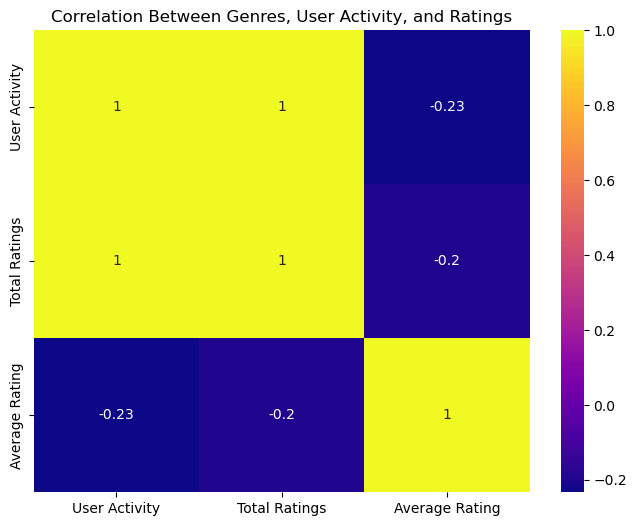

In [25]:
# 8. **Visualization Projects**

# `Heatmaps showing the correlation between genres, user activity, and ratings`

import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

movies_file = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\movies.dat','r', encoding='latin1')
rating_file = open(r'C:\Users\Samruddhi\Downloads\ml-1m\ml-1m\ratings.dat', 'r', encoding='latin1')

ratings = []
for line in rating_file:
    line = line.strip()
    columns = list(map(int, line.split('::')))
    user_id = columns[0]
    movie_id = columns[1]
    rating = columns[2]
    ratings.append((user_id, movie_id, rating))
    
movies = {}
movie_genres = set()
for line in movies_file:
    line = line.strip()
    columns = line.split('::')
    movie_id = int(columns[0])
    genres = columns[2].split('|')
    movies[movie_id] = genres
    movie_genres.update(genres)
    
genre_stats = {genre: {'Total Ratings': 0, 'Rating Count': 0} for genre in movie_genres}

for user_id, movie_id, rating in ratings:
    if movie_id in movies:
        genres = movies[movie_id]
        for genre in genres:
            genre_stats[genre]['Total Ratings'] += rating
            genre_stats[genre]['Rating Count'] += 1

for genre, stats in genre_stats.items():
    stats['Average Rating'] = stats['Total Ratings'] / stats['Rating Count'] if stats['Rating Count'] > 0 else 0
    stats['User Activity'] = stats['Rating Count']

genres = list(genre_stats.keys())
user_activity = [genre_stats[genre]['User Activity'] for genre in genres]
total_ratings = [genre_stats[genre]['Total Ratings'] for genre in genres]
average_ratings = [genre_stats[genre]['Average Rating'] for genre in genres]

data_matrix = np.array([user_activity, total_ratings, average_ratings])
correlation_matrix = np.corrcoef(data_matrix)

print("Correlational maxtrix")
print(correlation_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    xticklabels=['User Activity', 'Total Ratings', 'Average Rating'],
    yticklabels=['User Activity', 'Total Ratings', 'Average Rating'],
    cmap='plasma'
)
plt.title('Correlation Between Genres, User Activity, and Ratings')
plt.show()
